In [77]:
##Get Encodings##
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import sys
from pandas import read_csv
sys.path.append('../src/')
sys.path.append('')
from propythia.sequence import ReadSequence
sequence=ReadSequence()
from propythia.descriptors import Descriptor
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed

##Data Preprocessing##
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.utils import shuffle


##Deep Learning Models###
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RepeatedKFold

##Evaluating Results and Plotting##
from sklearn import metrics
from sklearn.metrics import make_scorer
from pandas import read_csv
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import f_regression

In [57]:
### Input Fasta and Run Dataset###

encodings = read_csv('./Delta_G_2000_Human_seq_encodings.csv', header=0)
pI_Values = read_csv('./pI_values.csv', header = 0)
print(encodings.shape)

(8394, 891)


In [58]:
X = encodings
y = pI_Values
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, shuffle=True)

In [59]:
##Function to build models##
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model



In [60]:
##Build model##
model = get_model(X.shape[1], 1)
##Fit model##
model.fit(X_train, y_train, verbose=2, epochs=200)
mae = model.evaluate(X_test, y_test, verbose=0)


Epoch 1/200
184/184 - 1s - loss: 21.6785 - 803ms/epoch - 4ms/step
Epoch 2/200
184/184 - 0s - loss: 3.7776 - 361ms/epoch - 2ms/step
Epoch 3/200
184/184 - 0s - loss: 1.9424 - 298ms/epoch - 2ms/step
Epoch 4/200
184/184 - 0s - loss: 3.1155 - 350ms/epoch - 2ms/step
Epoch 5/200
184/184 - 0s - loss: 2.0099 - 283ms/epoch - 2ms/step
Epoch 6/200
184/184 - 0s - loss: 2.7667 - 277ms/epoch - 2ms/step
Epoch 7/200
184/184 - 0s - loss: 1.2797 - 305ms/epoch - 2ms/step
Epoch 8/200
184/184 - 0s - loss: 1.5211 - 302ms/epoch - 2ms/step
Epoch 9/200
184/184 - 0s - loss: 1.2438 - 279ms/epoch - 2ms/step
Epoch 10/200
184/184 - 0s - loss: 1.2627 - 301ms/epoch - 2ms/step
Epoch 11/200
184/184 - 0s - loss: 1.4328 - 309ms/epoch - 2ms/step
Epoch 12/200
184/184 - 0s - loss: 1.1472 - 284ms/epoch - 2ms/step
Epoch 13/200
184/184 - 0s - loss: 0.9721 - 309ms/epoch - 2ms/step
Epoch 14/200
184/184 - 0s - loss: 0.8975 - 305ms/epoch - 2ms/step
Epoch 15/200
184/184 - 0s - loss: 0.9481 - 283ms/epoch - 2ms/step
Epoch 16/200
184/1

Correlation coefficient: 0.9511152997456929


Text(0, 0.5, 'Observed pI')

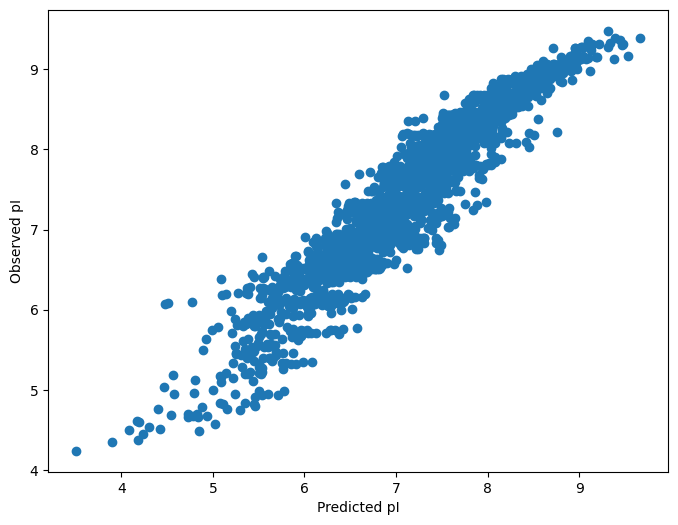

In [61]:
#Store Outputs#
predicted_results = []
observed_results  = []
maes = []

prediction = model.predict(X_test)
predictions = prediction.tolist()
predictions = [item for sublist in predictions for item in sublist]
validations = y_test.tolist()
validations = [item for sublist in validations for item in sublist]

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(predictions, validations)
correlation_coefficient = np.corrcoef(predictions,validations )
print("Correlation coefficient:", correlation_coefficient[0][1])

ax.set_xlabel('Predicted pI')
ax.set_ylabel('Observed pI')